In [1]:
import torch
assert torch.cuda.is_available()
import torch.nn as nn
import torch.optim as optim

from ptt.data.dataset_classification import CIFAR10
from ptt.models.small_cnn import SmallCNN
from ptt.data.pytorch_dataset import ImgClassificationDataset
from ptt.agents.classification_agent import ClassificationAgent
import ptt.visualization.visualize_imgs as vi
from ptt.eval.result import Result
from ptt.visualization.plot_results import plot_results

In [2]:
config = {'batch_size':128, 'lr':1e-3, 'momentum':0.9, 'device':'cuda:1', 'nr_epochs': 10, 'tracking_interval': 2}

In [3]:
# Fetch data, transform to PyTorch format and build dataloaders
data = CIFAR10()


In [4]:
datasets = {'train': ImgClassificationDataset(data, ix_lst=None, resize=None, norm=None),
    'test': ImgClassificationDataset(data, ix_lst=data.hold_out_ixs, resize=None, norm=None)}
dataloaders = dict()
for split, ds in datasets.items():
    shuffle = not(split == 'test')
    dataloaders[split] = torch.utils.data.DataLoader(ds, batch_size=config['batch_size'], shuffle=shuffle)

In [5]:
# Get model
model = SmallCNN(input_shape=data.input_shape, output_shape=data.output_shape)
model.to(config['device'])

KeyboardInterrupt: 

In [5]:
# Devine criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=config['lr'], momentum=config['momentum'])

In [6]:
# Train model
results = Result(name='training_trajectory')
agent = ClassificationAgent(config=config, base_criterion=criterion, verbose=True)
agent.train(results, model, optimizer, trainloader=dataloaders['train'], dataloaders=dataloaders)

Epoch 0 data train loss 0.10028
Epoch 0 data test loss 0.10026666666666667
Epoch 5 data train loss 0.41546
Epoch 5 data test loss 0.41496666666666665


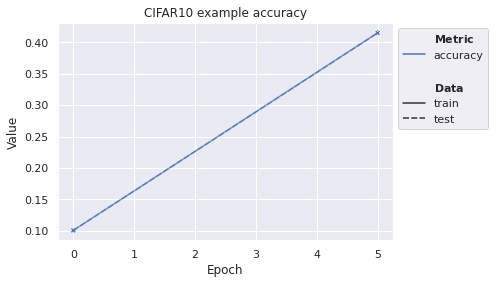

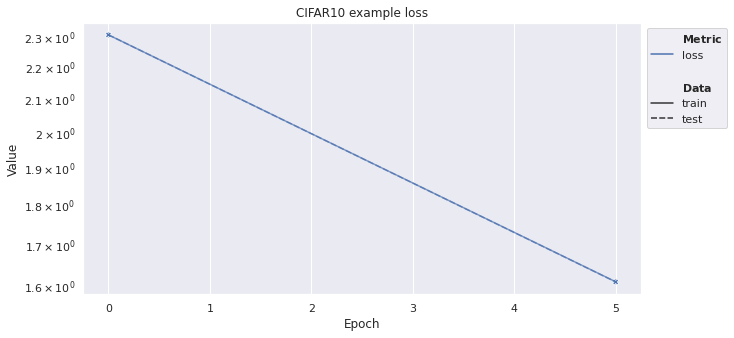

In [7]:
# Visualize results
save_path = os.path.join('test', 'test_obj')
plot_results(results, measures=['accuracy'], save_path=save_path, save_name='CIFAR10 example accuracy', title='CIFAR10 example accuracy')
plot_results(results, measures=['loss'], save_path=save_path, ylog=True, save_name='CIFAR10 example loss', title='CIFAR10 example loss')